# Flight Data Analytics

## Overview
Flight Data Analytics analyzes aviation accident data to identify potential risks associated with expansion to the aviation industry as well advise on how to mitigate said risks. The analysis leverages accident data to inform decisions on aircraft acquisition, equipment purchase as well as staff training to successfully purchase and  operate planes for  commercial and private enterprises.

## Business Problem
Our company is expanding into aviation and needs to evaluate potential risks associated with managing fleets of airplanes. The goal is to:
1.determine which aircraft are best to purchase
2.Necessary equipment to be purchased to enhance safety
3.Necessary experience needed by staff as well as additional training they should undertake

## Data Understanding

The data is sourced from the National Transportation Safety Board (NTSB), covering aviation accidents from 1948 to the end of 2022. It includes information such as:
1.accident severity
2,aircraft type
3.injury statistics
3.weather condition 
4.plane make and model 

For this particular project we will only analyse data going back six(6) years for actionable insight as requested by management


In [30]:
#importing standard libraries

from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns


In [31]:
pd.set_option("display.max_columns",500) #This allows me to look at all columns of the data frame

data=pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Phase 1 project\AviationData.csv",encoding="ISO-8859-1",dtype={6:str,7:str,28:str})  #Importing the data from my hard drive

In [32]:
df=data.copy()#Create a copy of the data to use for manipulation
df.head() #Check the first five rows make sure data is succesfully imported


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [33]:
df.shape #Checking the number of rows and columns



(88889, 31)

In [34]:
df.columns #Check for column names

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [35]:
df.info() #Summary of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [36]:
df.describe() #Statistical summary of my data frame

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [37]:
df.isnull().sum() #Check for null values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

# DATA PREPARATION

## Data Cleaning

Data cleaning and wrangling is essential to the data science process. I do these by first checking and dropping all the duplicates in the data frame.

Next I standardize all the column names by removing white space,using underscore as a separator and making all the characters lower case making them easier to call.

I then filter out all the data older than 6 years because of constant innovation and changing technologies in the aviation space

Dropping columns with more than half null values 

I impute all numerical columns with zero[0] and all the categorical with "unknown"

Lastly I drop all the non essential columns and finally I drop all rows with null values

In [38]:
#Check and drop duplicates
df.duplicated().sum()

0

In [39]:
#Standardize column names by removing white space, lowercase, using underscore to space 
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_").str.replace(".","_")

df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [40]:
#Drop data that is more than 6 years old 

#Covert event_date to date time format
df["event_date"]=pd.to_datetime(df["event_date"])
df["event_date"].isnull().sum() #check for any null values of thr event_date column

start="2017-01-01" #Define the start date

df=df[df["event_date"]>=start] #Filter the data set

df.head(10) #Check whether its been correctly filtered

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
79402,20170110X14448,Accident,GAA17CA108,2017-01-01,"Casa Grande, AZ",United States,325723N,1114550W,CGZ,CASA GRANDE MUNI,Non-Fatal,Substantial,Airplane,N5897R,LARSON ROGER H,RV-7,Yes,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilots inadvertent application of the aut...,25-09-2020
79403,20170117X42903,Accident,CEN17LA079,2017-01-01,"New Braunfels, TX",United States,293829N,0981210W,NaN,NaN,Non-Fatal,Substantial,Airplane,N415HC,QUICKSILVER,GT-400 R503,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The partial loss of engine power due to a loos...,25-09-2020
79404,20170103X14851,Accident,WPR17FA045,2017-01-02,"Payson, AZ",United States,342547N,1111640W,NaN,NaN,Fatal,Destroyed,Airplane,N272EF,CESSNA,T210K,No,1.0,Reciprocating,091,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,NaN,The non-instrument-rated pilot's improper deci...,25-09-2020
79405,20170103X43747,Accident,WPR17LA046,2017-01-03,"Paradise, MT",United States,472354N,0114491W,NaN,NaN,Non-Fatal,Substantial,Airplane,N710XP,SOFTEX INVEST LLC,V-24L,No,2.0,Reciprocating,091,NaN,Ferry,SUMMIT INTERNATIONAL AMERICAN LTD,0.0,0.0,2.0,0.0,VMC,NaN,A partial loss of power during cruise flight f...,25-09-2020
79406,20170105X45917,Accident,WPR17LA048,2017-01-04,"Napa, CA",United States,381232N,1221724W,APC,NAPA COUNTY,Non-Fatal,Substantial,Airplane,N4518S,SCHOSANSKI JOHN H,COZY MK IV R,Yes,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A partial loss of power due to missing apex se...,25-09-2020
79407,20170105X51011,Accident,CEN17LA068,2017-01-04,"Nacogdoches, TX",United States,313458N,0944225W,OCH,A L MANGHAM JR RGNL,Non-Fatal,Substantial,Airplane,N1159G,MOONEY AIRCRAFT CORP.,M20,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,VMC,NaN,The loss of engine power for reasons that coul...,25-09-2020
79408,20170105X81632,Accident,CEN17FA067,2017-01-04,"Brookfield, WI",United States,043525N,0881041W,02C,Capitol Airport,Fatal,Substantial,Airplane,N311SD,Demmer,BD-4,Yes,1.0,Reciprocating,091,NaN,Personal,NaN,1.0,0.0,1.0,1.0,VMC,NaN,The pilot's failure to abort the takeoff when ...,25-09-2020
79409,20170105X41106,Accident,WPR17FA047,2017-01-05,"San Pedro, CA",United States,334225N,1181528W,NaN,NaN,Fatal,Substantial,Helicopter,N702JJ,ROBINSON HELICOPTER,R22 BETA,No,1.0,Reciprocating,091,NaN,Aerial Observation,NaN,2.0,0.0,0.0,0.0,VMC,NaN,The pilot's failure to use carburetor heat whi...,25-09-2020
79410,20170105X74726,Accident,CEN17FA071,2017-01-05,"Gurdon, AR",United States,335434N,0093825W,NaN,NaN,Fatal,Destroyed,Airplane,N972JK,COLUMBIA AIRCRAFT MFG,LC41 550FG,No,1.0,Reciprocating,091,NaN,Personal,NaN,2.0,0.0,0.0,0.0,VMC,NaN,The loss of control in flight for reasons that...,25-09-2020
79411,20170105X85226,Accident,ERA17LA078,2017-01-05,"Atlanta, GA",United States,034047N,0843549W,RYY,Cobb County International Airp,Non-Fatal,Substantial,Airplane,N683AM,AIRCRAFT MFG & DEVELOPMENT CO,CH 2000,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,1.0,0.0,VMC,NaN,The pilot's exceedance of the airplane's criti...,25-09-2020


In [41]:
df.shape #The new shape of the filtered data

(9487, 31)

In [42]:
df.isnull().sum() #Check the null values of the new data

event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
airport_code              3979
airport_name              4162
injury_severity            559
aircraft_damage            780
aircraft_category          192
registration_number          2
make                         0
model                        0
amateur_built                0
number_of_engines         2019
engine_type               3795
far_description            199
schedule                  8421
purpose_of_flight         2194
air_carrier               5769
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition         2320
broad_phase_of_flight     9487
report_status             4522
publication_date           953
dtype: int64

In [43]:
#Drop columns with more than 50% of missing values
thresh=len(df)*0.5
df=df.loc[:,df.isnull().sum()<=thresh]

df.isnull().sum()

event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
airport_code              3979
airport_name              4162
injury_severity            559
aircraft_damage            780
aircraft_category          192
registration_number          2
make                         0
model                        0
amateur_built                0
number_of_engines         2019
engine_type               3795
far_description            199
purpose_of_flight         2194
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition         2320
report_status             4522
publication_date           953
dtype: int64

In [44]:
#Filling in numerical columns
numcol=["total_fatal_injuries", "total_serious_injuries","total_minor_injuries","total_uninjured","number_of_engines" ]
#The numerical columns will be filled with [0]
df[numcol]=df[numcol].fillna(0)
df.isnull().sum()

event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
airport_code              3979
airport_name              4162
injury_severity            559
aircraft_damage            780
aircraft_category          192
registration_number          2
make                         0
model                        0
amateur_built                0
number_of_engines            0
engine_type               3795
far_description            199
purpose_of_flight         2194
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition         2320
report_status             4522
publication_date           953
dtype: int64

In [45]:
#Categorical columns
catcol=["location","injury_severity","weather_condition","country","engine_type","aircraft_damage","aircraft_category"]
#They will be filled with unknown
df[catcol]=df[catcol].fillna("Unk")

df.isnull().sum()

event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
airport_code              3979
airport_name              4162
injury_severity              0
aircraft_damage              0
aircraft_category            0
registration_number          2
make                         0
model                        0
amateur_built                0
number_of_engines            0
engine_type                  0
far_description            199
purpose_of_flight         2194
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition            0
report_status             4522
publication_date           953
dtype: int64

In [46]:
#Dropping columns not useful for the analysis"fl
df=df.drop(columns=["airport_code","airport_name","registration_number","publication_date","accident_number","longitude","latitude","far_description","report_status","purpose_of_flight"])





In [47]:
df.isnull().sum()

event_id                  0
investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
dtype: int64

In [48]:
 #Drop all other null values
df=df.dropna()

In [49]:
df.shape

(9487, 18)

In [50]:

#Check our final data set with no null values
df.isnull().sum()

event_id                  0
investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
dtype: int64

In [51]:

# Convert all names in the 'make' column to lowercase
df['make'] = df['make'].str.lower().str.replace(" ","_")

# Display unique makes to confirm the changes
unique_makes = df['make'].unique()

# Print the first 50 unique makes and total count
print("Unique Aircraft Makes in Lowercase:")
print(unique_makes[:50])  # Display the first 50 unique makes
print(f"Total unique aircraft makes: {len(unique_makes)}")



Unique Aircraft Makes in Lowercase:
['larson_roger_h' 'quicksilver' 'cessna' 'softex_invest_llc'
 'schosanski_john_h' 'mooney_aircraft_corp.' 'demmer'
 'robinson_helicopter' 'columbia_aircraft_mfg'
 'aircraft_mfg_&_development_co' 'boeing' 'canadair' 'cirrus'
 'christen_industries_inc' 'boeing_company' 'maule' 'fields' 'mooney'
 'piper' 'sharpe_william_l' 'beech' 'piper_aircraft_corporation' 'aeronca'
 'american_champion_aircraft' 'textron_aviation_inc'
 'american_legend_aircraft_co' 'johnson' 'air_tractor_inc'
 'hawker_beechcraft' 'avro' 'hawker_beechcraft_corp' 'bellanca' 'robinson'
 'bombardier_inc' 'bell' 'cirrus_design_corp'
 'grumman_american_corporation' 'eurocopter_deutschland_gmbh' 'ercoupe'
 'great_lakes' 'vaughan_gerald_r' 'aviat_aircraft_inc' 'zenith' 'cook'
 'robinson_michael_e' 's_c_aerostar_s_a' 'bell_helicopter_textron'
 'shell_john' 'saab' 'md_helicopter']
Total unique aircraft makes: 1405


In [52]:
df.shape

(9487, 18)

In [53]:
df.to_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Phase 1 project\AviationData_clean.csv",index=False)


# ANALYSIS

## 1. Analyse injury severity by weather condition
We can see that majority of accidents, even though they are non-fatal, happen during clear skies and weather conditions when pilots rely on visual references and stimuli


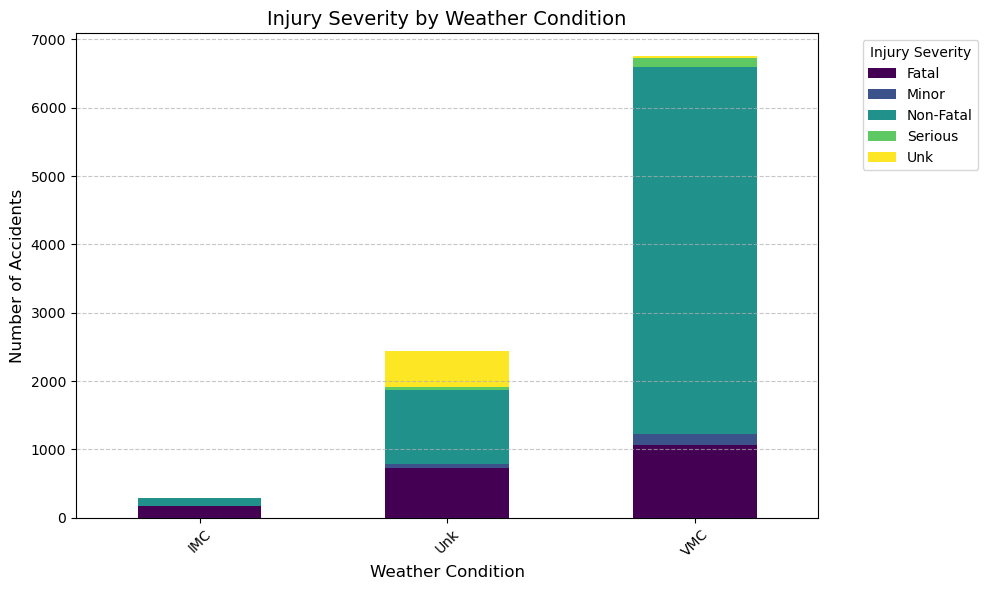

In [54]:

# Cross-tabulation of weather condition and injury severity
weather_injury = pd.crosstab(df['weather_condition'], df['injury_severity'])

# Visualize the relationship
weather_injury.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Injury Severity by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



## 2.Aircraft make & model by fatalities per accidents
Modern aircrafts are all relatively safe due to strict regulations by relevant authorites. Even though we can clearly see the Airbus A320 and Boeing 737 have more accidents than the rest

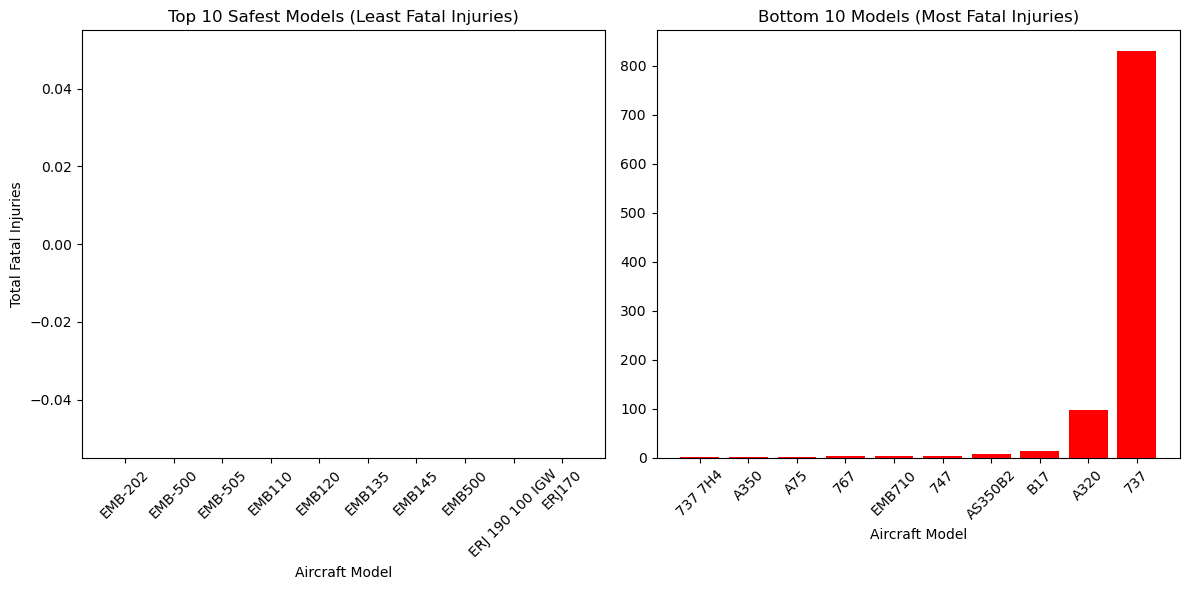

In [55]:
# Aggregate accident and fatality data by make and model
safest_models = df.groupby(['make',"model"]).agg({
    'event_id': 'count',  # Total accidents
    'total_fatal_injuries': 'sum'  # Total fatalities
}).reset_index()

safest_models=safest_models.sort_values(by="total_fatal_injuries",ascending=True)
# safest_models.tail(50)
# "embraer" in safest_models["make"].unique() 

# biggest Commercial Plane manufacturer
commercial_planes=safest_models[safest_models["make"].str.lower().isin(["boeing","airbus","embraer"])]
commercial_planes.head()


# Get the top 10 models with the least fatalities
top_10 = commercial_planes.head(10)

# Get the bottom 10 models with the most fatalities
bottom_10 = commercial_planes.tail(10)

# Plot side-by-side bar charts
plt.figure(figsize=(12, 6))

# Plot top 10 models with the least fatalities
plt.subplot(1, 2, 1)
plt.bar(top_10['model'], top_10['total_fatal_injuries'], color='green')
plt.title('Top 10 Safest Models (Least Fatal Injuries)', fontsize=12)
plt.xlabel('Aircraft Model', fontsize=10)
plt.ylabel('Total Fatal Injuries', fontsize=10)
plt.xticks(rotation=45)

# Plot bottom 10 models with the most fatalities
plt.subplot(1, 2, 2)
plt.bar(bottom_10['model'], bottom_10['total_fatal_injuries'], color='red')
plt.title('Bottom 10 Models (Most Fatal Injuries)', fontsize=12)
plt.xlabel('Aircraft Model', fontsize=10)
plt.xticks(rotation=45)

# Adjust layout for readability
plt.tight_layout()
plt.show()



## 3.  Analyse total number of accidents by weather conditions
This graph shows that majority of accidents happen during clear weather conditions while pilots use visual flight rules(VFR)


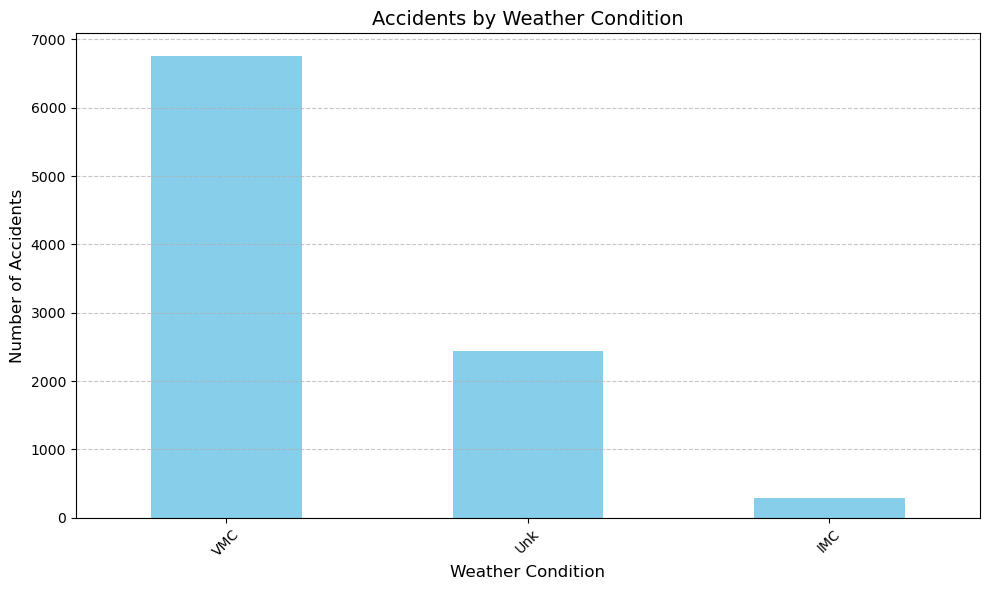

In [56]:

# Count accidents by each weather condition
weather_accidents = df['weather_condition'].value_counts()

# Plot weather accidents
plt.figure(figsize=(10, 6))
weather_accidents.plot(kind='bar', color='skyblue')
plt.title('Accidents by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# CONCLUSION
The analysis conducted leads to the following observations and recommendations

**1.Invest in advanced training programs for pilots to enhance navigational skills and advanced situational awareness.** 

This is because most accidents happen during clear skies/ visual meteorological conditions suggesting that over reliance in visual references leads to errors.

**2.Consider other factors such as RELIABILITY,EFFICIENCY,VERSATILITY AND PRICE while purchasing aircrafts instead of accident data.**

This is because even though we can clearly see the Airbus A320 and Boeing 737 have more accidents than the rest its crucial to note that it's not a reflection on poor safety. These two are the most widely used planes 

**3.Adopt advanced navigation and auto pilot systems to enhance safety even clear weather conditions**

Most accidents happen during VFR conditions which are deceptively safer but pose unique challenges


